In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

# Homework
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

In this homework, we will use the Car price dataset like last week. Download it from here.

Or you can do it with wget:

wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
We'll work with the MSRP variable, and we'll transform it to a classification task.

For the rest of the homework, you'll need to use only these columns:

Make,
Model,
Year,
Engine HP,
Engine Cylinders,
Transmission Type,
Vehicle Style,
highway MPG,
city mpg
MSRP

In [2]:
df_full = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")

In [3]:
df_full.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
columns_to_keep = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

df = df_full[columns_to_keep]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


# Data preparation
Keep only the columns above
Lowercase the column names and replace spaces with underscores
Fill the missing values with 0
Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average
Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
#df

In [6]:
df.rename(columns = {'msrp':'price'}, inplace = True) 
#df

/Users/rileen/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [7]:
# Which columns/features have NAs/Nulls?
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [8]:
# Replace NAs by zero
df.fillna(0, inplace=True)
df.isnull().sum()

/Users/rileen/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

# Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the above_average variable
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

engine_hp
engine_cylinders
highway_mpg
city_mpg

In [9]:

# Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.
df['above_average'] = (df.price > df.price.mean()).astype(int)
#df['above_average']

/Users/rileen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_for_training = df.copy()
del df_for_training['price']
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

df_train_full, df_test = train_test_split(df_for_training, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [11]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
5727,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
5814,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
8450,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
2396,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
5494,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17
7518,Nissan,Pathfinder,2015,260.0,6.0,AUTOMATIC,4dr SUV,26,19
5406,Volkswagen,Golf GTI,2017,220.0,4.0,MANUAL,4dr Hatchback,34,24
7519,Nissan,Pathfinder,2015,260.0,6.0,AUTOMATIC,4dr SUV,26,19
11447,Ford,Windstar,2003,200.0,6.0,AUTOMATIC,Passenger Minivan,22,16
3399,Mazda,CX-7,2012,161.0,4.0,AUTOMATIC,4dr SUV,27,20


In [12]:
numerical = numerical[:-1] # Drop 'price' from features 

# CALCULATING ROC AUC SCORE PER FEATURE:
for c in numerical:
    c_above_average = (df_train[c]>=df_train[c].mean()).astype(int)

    auc = roc_auc_score(y_train, c_above_average)
    if auc < 0.5:
        auc = roc_auc_score(y_train, -c_above_average)
        
    print('%s, %.3f' % (c, auc))

year, 0.665
engine_hp, 0.812
engine_cylinders, 0.697
highway_mpg, 0.604
city_mpg, 0.620


<b> engine_hp has the highest AUC </b>

In [13]:

# numerical = numerical[:-1] # Drop 'price' from features 

scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_num = df_train[numerical].values
X_train_num = scaler.fit_transform(X_train_num)

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cat = ohe.fit_transform(df_train[categorical].values)

X_train = np.column_stack([X_train_num, X_train_cat])

X_val_num = df_val[numerical].values
X_val_num = scaler.transform(X_val_num)

X_val_cat = ohe.transform(df_val[categorical].values)

X_val = np.column_stack([X_val_num, X_val_cat])

model = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
original_accuracy = round(accuracy_score(y_val, y_pred),2)
# print(f"Accuracy on the validation dataset: {original_accuracy}")

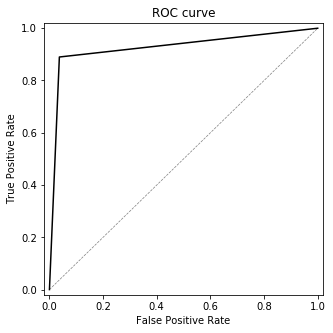

In [14]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
# auc_val = auc(fpr,tpr)
# print(f"AUC on the validation dataset: {auc_val}")


plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [15]:
from sklearn.metrics import roc_auc_score

model_one_feature = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=1)
model_one_feature.fit(np.array(df_train['engine_hp']).reshape(-1, 1),y_train)
y_pred = model_one_feature.predict(np.array(df_val['engine_hp']).reshape(-1, 1))
engine_hp_accuracy = round(accuracy_score(y_val, y_pred),3)
print(f"Accuracy on the validation dataset with just engine_hp: {engine_hp_accuracy}")

engine_hp_auc = round(roc_auc_score(y_val, y_pred),3)
print(f"AUC on the validation dataset with just engine_hp: {engine_hp_auc}")

Accuracy on the validation dataset with just engine_hp: 0.869
AUC on the validation dataset with just engine_hp: 0.797


In [16]:
model_one_feature = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=1)
model_one_feature.fit(np.array(df_train['engine_cylinders']).reshape(-1, 1),y_train)
y_pred = model_one_feature.predict(np.array(df_val['engine_cylinders']).reshape(-1, 1))
engine_cylinders_accuracy = round(accuracy_score(y_val, y_pred),3)
print(f"Accuracy on the validation dataset with engine_cylinders: {engine_cylinders_accuracy}")

engine_cylinders_auc = round(roc_auc_score(y_val, y_pred),3)
print(f"AUC on the validation dataset with just engine_cylinders: {engine_cylinders_auc}")

Accuracy on the validation dataset with engine_cylinders: 0.788
AUC on the validation dataset with just engine_cylinders: 0.692


In [17]:
model_one_feature = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=1)
model_one_feature.fit(np.array(df_train['highway_mpg']).reshape(-1, 1),y_train)
y_pred = model_one_feature.predict(np.array(df_val['highway_mpg']).reshape(-1, 1))
highway_mpg_accuracy = round(accuracy_score(y_val, y_pred),3)
print(f"Accuracy on the validation dataset with just highway_mpg: {highway_mpg_accuracy}")

highway_mpg_auc = round(roc_auc_score(y_val, y_pred),3)
print(f"AUC on the validation dataset with just highway_mpg: {highway_mpg_auc}")

Accuracy on the validation dataset with just highway_mpg: 0.726
AUC on the validation dataset with just highway_mpg: 0.5


In [18]:
model_one_feature = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=1)
model_one_feature.fit(np.array(df_train['city_mpg']).reshape(-1, 1),y_train)
y_pred = model_one_feature.predict(np.array(df_val['city_mpg']).reshape(-1, 1))
city_mpg_accuracy = round(accuracy_score(y_val, y_pred),3)
print(f"Accuracy on the validation dataset with just city_mpg: {city_mpg_accuracy}")

city_mpg_auc = round(roc_auc_score(y_val, y_pred),3)
print(f"AUC on the validation dataset with just highway_mpg: {city_mpg_auc}")

Accuracy on the validation dataset with just city_mpg: 0.727
AUC on the validation dataset with just highway_mpg: 0.502


# Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

0.678
0.779
0.878
0.979

In [19]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_num = df_train[numerical].values
X_train_num = scaler.fit_transform(X_train_num)

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cat = ohe.fit_transform(df_train[categorical].values)

X_train = np.column_stack([X_train_num, X_train_cat])

X_val_num = df_val[numerical].values
X_val_num = scaler.transform(X_val_num)

X_val_cat = ohe.transform(df_val[categorical].values)

X_val = np.column_stack([X_val_num, X_val_cat])

#model_C1 = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
#model_C1 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=1)
model_C1 = LogisticRegression(solver='liblinear', C=1, max_iter=1000)
model_C1.fit(X_train,y_train)
y_pred = model_C1.predict(X_val)
C1_accuracy = round(accuracy_score(y_val, y_pred),3)
print(f"Accuracy on the validation dataset with C1: {C1_accuracy}")
C1_auc = round(roc_auc_score(y_val, y_pred),3)
print(f"AUC on the validation dataset with C1: {C1_auc}")

Accuracy on the validation dataset with C1: 0.943
AUC on the validation dataset with C1: 0.926


In [20]:
SEED = 1

# dv = DictVectorizer(sparse=False)
dv = DictVectorizer(sparse=True)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
# model = LogisticRegression(solver='liblinear', max_iter=1000, C=1, random_state=SEED)
model = LogisticRegression(solver='liblinear', max_iter=1000, C=1)
model.fit(X_train, y_train)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)
C1_accuracy = round(accuracy_score(y_val, y_pred),3)
print(f"Accuracy on the validation dataset with C1: {C1_accuracy}")
C1_auc = round(roc_auc_score(y_val, y_pred),3)
print(f"AUC on the validation dataset with C1: {C1_auc}")

Accuracy on the validation dataset with C1: 0.933
AUC on the validation dataset with C1: 0.912


In [21]:
from sklearn.metrics import classification_report

# print(classification_report(y_val, y_pred, target_names=features))

<b> AUC on the validation dataset is 0.979 </b>

# Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
At which threshold precision and recall curves intersect?

0.28
0.48
0.68
0.88

In [22]:
y_pred = model.predict_proba(X_val)[:, 1]

scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [23]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,654,1729,0,0
1,0.01,652,858,2,871
2,0.02,651,706,3,1023
3,0.03,651,622,3,1107
4,0.04,650,567,4,1162
5,0.05,650,498,4,1231
6,0.06,650,462,4,1267
7,0.07,647,438,7,1291
8,0.08,646,417,8,1312
9,0.09,645,385,9,1344


In [24]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

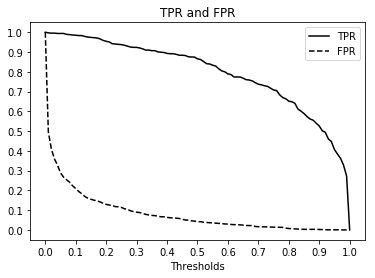

In [25]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

plt.show()

In [26]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,654,1729,0,0,1.000000,1.000000
1,0.01,652,858,2,871,0.996942,0.496241
2,0.02,651,706,3,1023,0.995413,0.408329
3,0.03,651,622,3,1107,0.995413,0.359746
4,0.04,650,567,4,1162,0.993884,0.327935
5,0.05,650,498,4,1231,0.993884,0.288028
6,0.06,650,462,4,1267,0.993884,0.267206
7,0.07,647,438,7,1291,0.989297,0.253326
8,0.08,646,417,8,1312,0.987768,0.241180
9,0.09,645,385,9,1344,0.986239,0.222672


In [27]:
df_scores['precision'] = df_scores.tp/(df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp/(df_scores.tp + df_scores.fn)
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall
0,0.00,654,1729,0,0,1.000000,1.000000,0.274444,1.000000
1,0.01,652,858,2,871,0.996942,0.496241,0.431788,0.996942
2,0.02,651,706,3,1023,0.995413,0.408329,0.479735,0.995413
3,0.03,651,622,3,1107,0.995413,0.359746,0.511390,0.995413
4,0.04,650,567,4,1162,0.993884,0.327935,0.534100,0.993884
5,0.05,650,498,4,1231,0.993884,0.288028,0.566202,0.993884
6,0.06,650,462,4,1267,0.993884,0.267206,0.584532,0.993884
7,0.07,647,438,7,1291,0.989297,0.253326,0.596313,0.989297
8,0.08,646,417,8,1312,0.987768,0.241180,0.607714,0.987768
9,0.09,645,385,9,1344,0.986239,0.222672,0.626214,0.986239


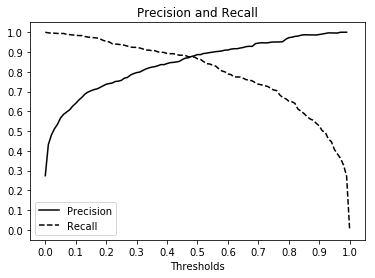

In [28]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.precision, color='black', linestyle='solid', label='Precision')
plt.plot(df_scores.threshold, df_scores.recall, color='black', linestyle='dashed', label='Recall')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('Precision and Recall')

plt.show()

In [29]:
df_scores.iloc[47:51]

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall
47,0.47,573,85,81,1644,0.876147,0.049161,0.870821,0.876147
48,0.48,572,80,82,1649,0.874618,0.046270,0.877301,0.874618
49,0.49,572,77,82,1652,0.874618,0.044534,0.881356,0.874618
50,0.50,566,72,88,1657,0.865443,0.041643,0.887147,0.865443


<b> The precision and recall curves intersect at threshold = 0.48 (nearest answer) </b>

# Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

 

Where 
 is precision and 
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

0.12
0.32
0.52
0.72

In [30]:
df_scores['F1'] = (2* df_scores.precision * df_scores.recall)/(df_scores.precision + df_scores.recall)

In [31]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,F1
0,0.00,654,1729,0,0,1.000000,1.000000,0.274444,1.000000,0.430688
1,0.01,652,858,2,871,0.996942,0.496241,0.431788,0.996942,0.602588
2,0.02,651,706,3,1023,0.995413,0.408329,0.479735,0.995413,0.647439
3,0.03,651,622,3,1107,0.995413,0.359746,0.511390,0.995413,0.675662
4,0.04,650,567,4,1162,0.993884,0.327935,0.534100,0.993884,0.694816
5,0.05,650,498,4,1231,0.993884,0.288028,0.566202,0.993884,0.721421
6,0.06,650,462,4,1267,0.993884,0.267206,0.584532,0.993884,0.736127
7,0.07,647,438,7,1291,0.989297,0.253326,0.596313,0.989297,0.744106
8,0.08,646,417,8,1312,0.987768,0.241180,0.607714,0.987768,0.752475
9,0.09,645,385,9,1344,0.986239,0.222672,0.626214,0.986239,0.766033


In [32]:
df_scores.iloc[np.linspace(12, 72, 7)]

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,F1
12,0.12,643,316,11,1413,0.983180,0.182765,0.670490,0.983180,0.797272
22,0.22,616,213,38,1516,0.941896,0.123193,0.743064,0.941896,0.830748
32,0.32,599,144,55,1585,0.915902,0.083285,0.806191,0.915902,0.857552
42,0.42,583,105,71,1624,0.891437,0.060729,0.847384,0.891437,0.868852
52,0.52,557,67,97,1662,0.851682,0.038751,0.892628,0.851682,0.871674
62,0.62,506,46,148,1683,0.773700,0.026605,0.916667,0.773700,0.839138
72,0.72,477,27,177,1702,0.729358,0.015616,0.946429,0.729358,0.823834


In [33]:
max(df_scores.F1)

max_F1_idx = df_scores["F1"].idxmax()
optimal_threshold = df_scores.loc[max_F1_idx, "threshold"]

print(f"The maximal F1 score is {df_scores['F1'][max_F1_idx]:.2f} at threshold {optimal_threshold:.2f}")

The maximal F1 score is 0.88 at threshold 0.49


In [34]:
df_scores.iloc[40:59]

,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall,F1
40,0.40,584,110,70,1619,0.892966,0.063621,0.841499,0.892966,0.866469
41,0.41,583,106,71,1623,0.891437,0.061307,0.846154,0.891437,0.868206
42,0.42,583,105,71,1624,0.891437,0.060729,0.847384,0.891437,0.868852
43,0.43,581,103,73,1626,0.888379,0.059572,0.849415,0.888379,0.868460
44,0.44,578,100,76,1629,0.883792,0.057837,0.852507,0.883792,0.867868
45,0.45,578,93,76,1636,0.883792,0.053788,0.861401,0.883792,0.872453
46,0.46,577,87,77,1642,0.882263,0.050318,0.868976,0.882263,0.875569
47,0.47,573,85,81,1644,0.876147,0.049161,0.870821,0.876147,0.873476
48,0.48,572,80,82,1649,0.874618,0.046270,0.877301,0.874618,0.875957
49,0.49,572,77,82,1652,0.874618,0.044534,0.881356,0.874618,0.877974


<b> F1 is maximal at threshold = 0.52 (nearest answer) </b>



Question 5: 5-Fold CV
--------------------------
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
How large is standard devidation of the scores across different folds?

0.003
0.030
0.090
0.140

In [35]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [36]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.above_average

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.above_average

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)
    
np.array(aucs).round(3)

print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))


auc = 0.979 ± 0.001


<b> The standard devidation of the scores across different folds is 0.003 (nearest answer) </b>

# Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 0.5, 10]
Initialize KFold with the same parameters as previously
Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
Which C leads to the best mean score?

0.01
0.1
0.5
10
If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [37]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)

    return dv, model

def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred


nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)



for C in [0.01,0.1,0.5,10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        y_train = df_train.above_average
        
        df_val = df_train_full.iloc[val_idx]
        y_val = df_val.above_average
        
        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.01, auc = 0.952 ± 0.002
C=0.1, auc = 0.972 ± 0.002
C=0.5, auc = 0.979 ± 0.003
C=10, auc = 0.981 ± 0.002


<b> C = 10 gives the highest AUC </b>